In [1]:
from ezonnx.ops.visualize import visualize_images

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


### Depth Estimation with DepthAnythingV2

ONNX path: /Users/satoshi/.cache/huggingface/hub/models--onnx-community--depth-anything-v2-small/snapshots/02504fff2a0de682e3162e5e89bdeab034e1b96d/onnx/model_fp16.onnx


/Users/satoshi/python/ezonnx/.venv/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


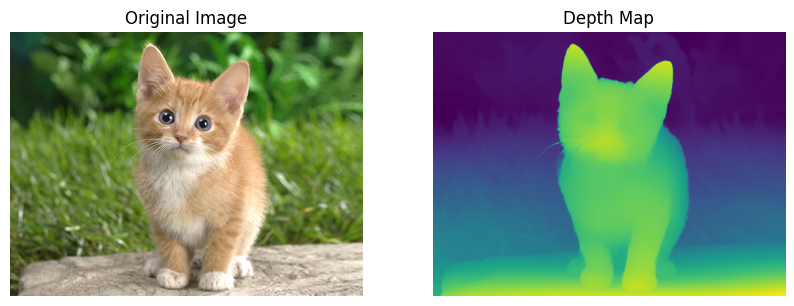

In [3]:
from ezonnx import DepthAnythingV2
depther = DepthAnythingV2(backbone="small",quantize="fp16")
res = depther("images/cat.jpg")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Depth Map"],
                    [res.original_img[...,::-1],res.processed_img])


### Background removal with RMBG1.4

ONNX path: /Users/satoshi/.cache/huggingface/hub/models--briaai--RMBG-1.4/snapshots/2ceba5a5efaec153162aedea169f76caf9b46cf8/onnx/model_quantized.onnx


/Users/satoshi/python/ezonnx/.venv/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


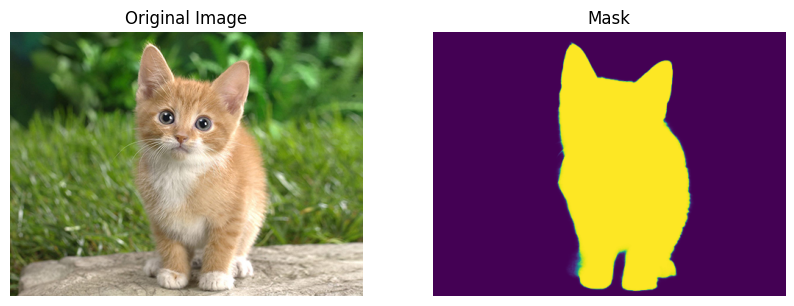

In [4]:
from ezonnx import RMBG14
rmbg = RMBG14(quantize="quantized")
res = rmbg("images/cat.jpg")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Mask"],
                    [res.original_img[...,::-1],res.processed_img])

### Image inpainting with LaMa

ONNX path: /Users/satoshi/.cache/huggingface/hub/models--Carve--LaMa-ONNX/snapshots/c3c0c9e468934d62e79c329e35d82dd09ff8c444/lama_fp32.onnx


/Users/satoshi/python/ezonnx/.venv/lib/python3.12/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:121: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


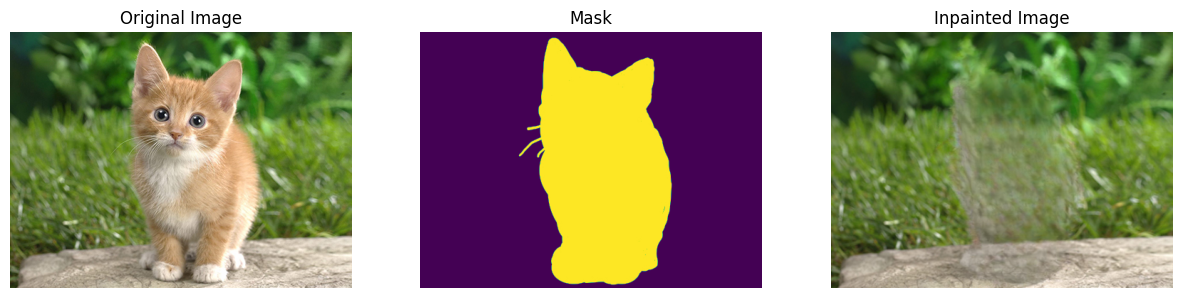

In [2]:
from ezonnx import LaMa
lama = LaMa()
result = lama("images/cat.jpg","images/cat_mask.png")  # image is a numpy array (H, W, 3) in RGB format
visualize_images(["Original Image","Mask","Inpainted Image"],
                    [result.original_img[...,::-1],result.mask,result.processed_img])